# Q1. 畫出 Diamond Shape

In [9]:
def diamond(n):
    for i in range(0,n-1):
        print (" "*(n-i-1)+"*"*(i*2+1))
    for j in range(0,n):
        print (" "*(j)+"*"*(2*(n-j)-1))

In [10]:
diamond(5)

    *
   ***
  *****
 *******
*********
 *******
  *****
   ***
    *


In [11]:
diamond(10)

         *
        ***
       *****
      *******
     *********
    ***********
   *************
  ***************
 *****************
*******************
 *****************
  ***************
   *************
    ***********
     *********
      *******
       *****
        ***
         *


# Q2. 刪除重複性資料

In [12]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

In [13]:
# 取得公司資料
def get_companies(ex = "NASDAQ"):
    template = "http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange={}&render=download"
    url = template.format(ex)
    return pd.read_csv(url)

In [14]:
df = get_companies()

In [15]:
df.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.325,4.383841e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
1,TURN,180 Degree Capital Corp.,1.9601,6.100137e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
2,FLWS,"1-800 FLOWERS.COM, Inc.",10.5,6.785569e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
3,FCCY,1st Constitution Bancorp (NJ),18.2408,1.472608e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
4,SRCE,1st Source Corporation,50.14,1.300438e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [16]:
symbols_01 = df[(df['MarketCap'] > 1e8) & (df['MarketCap'] < 2e8)]['Symbol'].tolist()

In [17]:
df['LastSale'] = df['LastSale'].str.replace('n/a','0.0').astype(float)

In [18]:
symbols_02 = df[(df['LastSale'] > 5) & (df['LastSale'] < 10)]['Symbol'].tolist()

In [19]:
with open('symbols_01.txt','w')as f:
    for symbol in symbols_01:
        f.write(symbol.strip().upper() + "\n")

In [20]:
with open('symbols_02.txt','w')as f:
    for symbol in symbols_02:
        f.write(symbol.strip().upper() + "\n")

In [21]:
symbols_03 = set(symbols_01).union(set(symbols_02))

In [22]:
with open('symbols_03.txt','w')as f:
    for symbol in symbols_01:
        f.write(symbol.strip().upper() + "\n")

In [23]:
symbols_03

{'ABCD',
 'ABDC',
 'ACFC',
 'ACMR',
 'ACSF',
 'ADAP',
 'ADES',
 'ADMA',
 'ADMP',
 'ADRE',
 'ADRO',
 'ADVM',
 'ADXS',
 'AGFS',
 'AGLE',
 'AGRX',
 'AHPA',
 'AINV',
 'AIRG',
 'AIRR',
 'AKTS',
 'ALDX',
 'ALJJ',
 'ALLT',
 'ALPN',
 'ALRN',
 'ALSK',
 'AMBCW',
 'AMD',
 'AMEH',
 'AMRS',
 'APOP',
 'APPS',
 'ARAY',
 'ARCT',
 'ARDX',
 'ARQL',
 'ASCMA',
 'ASFI',
 'ASNS',
 'ASPU',
 'ASUR',
 'ASV',
 'ASYS',
 'ATAC',
 'ATAI',
 'ATAX',
 'ATHX',
 'ATTU',
 'AUBN',
 'AUDC',
 'AUTO',
 'AVDL',
 'AVID',
 'AVXL',
 'AXON          ',
 'AXSM',
 'AXTI',
 'BANX',
 'BCAC',
 'BCOV',
 'BDSI',
 'BGFV',
 'BKCC',
 'BKEP',
 'BKEPP',
 'BLCM',
 'BLFS',
 'BLPH',
 'BOCH',
 'BOXL',
 'BRAC',
 'BRID',
 'BRPA',
 'BRQS',
 'BSQR',
 'BV',
 'BVXV',
 'BYBK',
 'CAAS',
 'CALA',
 'CALL',
 'CAMT',
 'CART',
 'CASC',
 'CASI',
 'CBAN',
 'CBAY',
 'CBFV',
 'CBIO',
 'CBMG',
 'CCLP',
 'CCUR',
 'CCXI',
 'CDNA',
 'CDOR',
 'CDTX',
 'CDXC',
 'CDXS',
 'CECE',
 'CELC',
 'CELH',
 'CEMI',
 'CETXP',
 'CFMS',
 'CGEN',
 'CGNT',
 'CGO',
 'CHRS',
 'CHW',
 '

# Q3. 下載台灣上市公司基本資料

In [24]:
import requests 
from bs4 import BeautifulSoup
from io import StringIO

In [25]:
url= 'http://dts.twse.com.tw/opendata/t187ap03_L.csv'
r = requests.get(url)  

In [26]:
r.encoding= 'big5'

In [27]:
r.text
info = r.text.split('\r\n')
print(info)

['106年12月13日17:30:01公司基本資料,', '"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" ', '"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",', '"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",', '"1103","嘉新水泥股份有限公司","水

In [28]:
info = StringIO(r.text)

In [29]:
pd.read_csv(info,skiprows=1)

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4. 畫出技術曲線

# MACD
計算方法：
12日EMA(指數移動平均)的計算：EMA12 = 前一日EMA12 X 11/13 + 今日收盤價 X 2/13，
26日EMA的計算：EMA26 = 前一日EMA26 X 25/27 + 今日收盤價 X 2/27，
DIF = EMA12 - EMA26，
根据DIF計算其9日的EMA，即平均DIF值，是所求的DEA值。今日DEA = （前一日DEA X 8/10 + 今日DIF X 2/10），
DIF與它自己的移動平均之間差距的大小一般BAR=（DIF-DEA)2，即為MACD柱狀圖。

In [30]:
%matplotlib notebook
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
import talib
import numpy as np

In [31]:
df = web.DataReader('2330','yahoo',datetime(2008,1,1))

In [32]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-04,288.0,288.0,275.0,280.0,280.0,23830.0
2008-01-07,276.0,283.0,265.0,270.0,270.0,48590.0
2008-01-08,262.0,270.0,261.0,267.5,267.5,32200.0
2008-01-09,267.0,273.0,261.0,273.0,273.0,30590.0
2008-01-10,270.0,279.5,268.0,268.0,268.0,33710.0


In [33]:
df[df['Volume']==0]=np.nan
df= df.dropna()

In [34]:
def myMACD(price, fastperiod=12, slowperiod=26, signalperiod=9):
    ewma12 = pd.ewma(price,span=fastperiod)
    ewma60 = pd.ewma(price,span=slowperiod)
    dif = ewma12-ewma60
    dea = pd.ewma(dif,span=signalperiod)
    bar = (dif-dea) #有些地方的bar = (dif-dea)*2，但是talib中MACD的计算是bar = (dif-dea)*1
    return dif,dea,bar

In [35]:
macd, signal, hist = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [36]:
mydif,mydea,mybar = myMACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  """


<IPython.core.display.Javascript object>


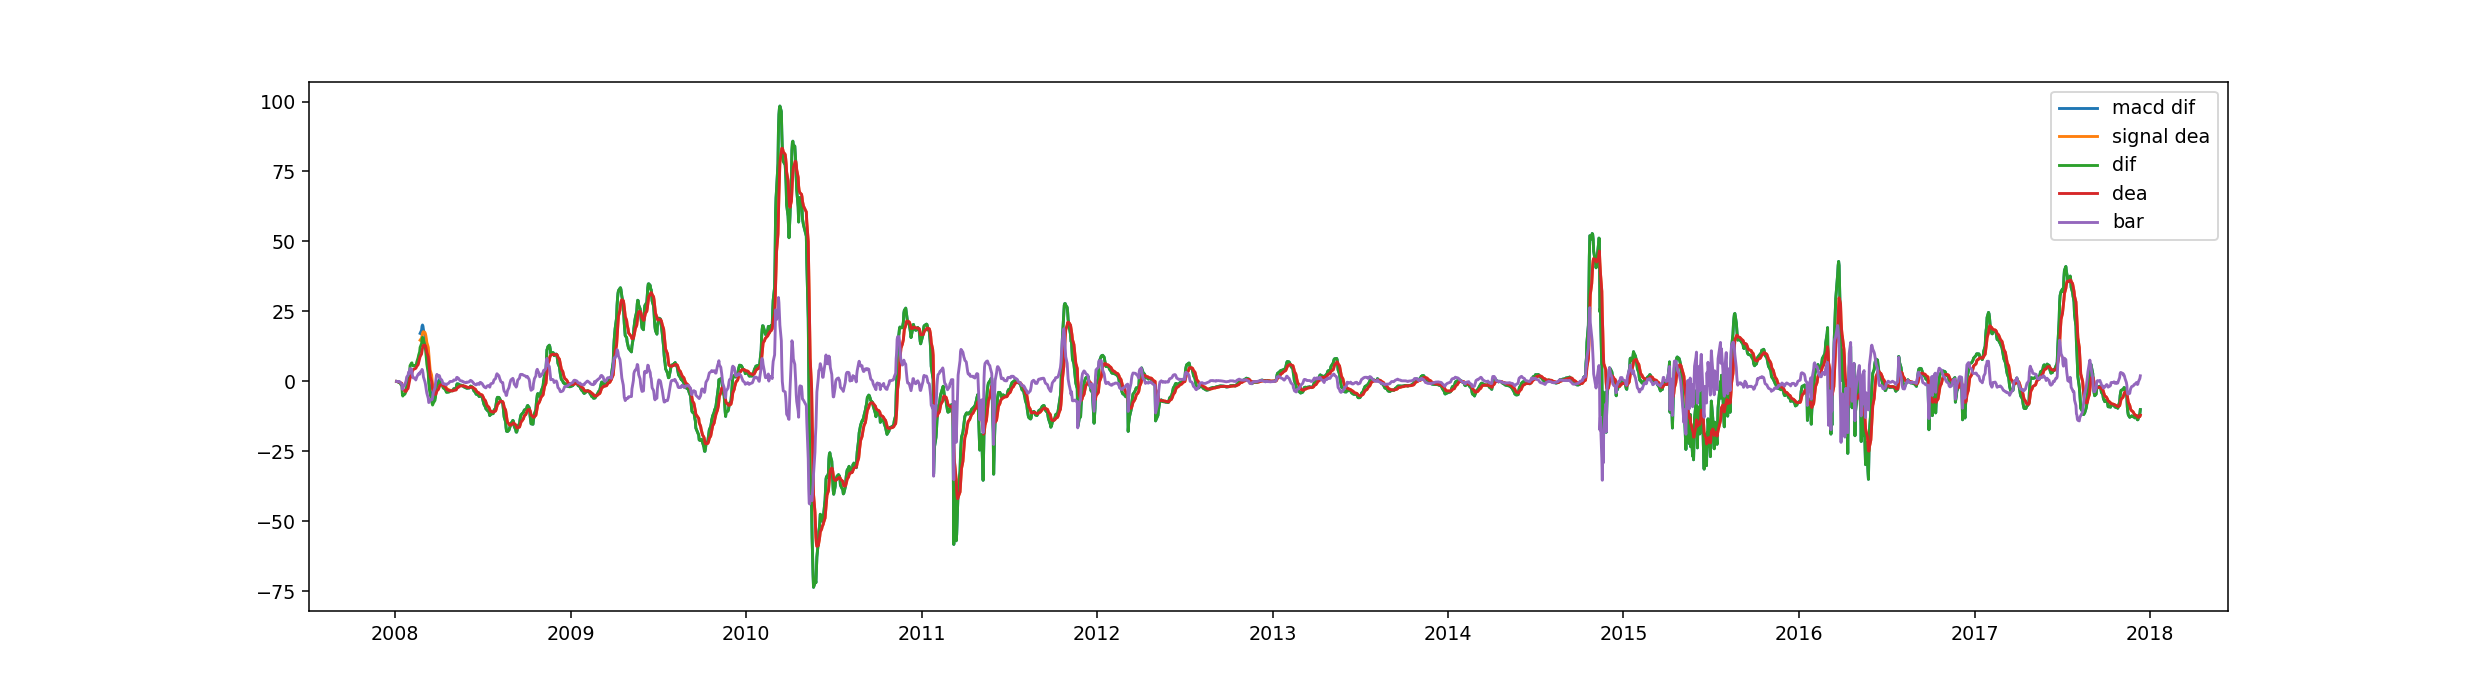

In [37]:
fig = plt.figure(figsize=[18,5])
plt.plot(df.index,macd,label='macd dif')
plt.plot(df.index,signal,label='signal dea')
plt.plot(df.index,mydif,label='dif')
plt.plot(df.index,mydea,label='dea')
plt.plot(df.index,mybar,label='bar')
plt.legend(loc='best')

# Q5. 策略回測

In [57]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [71]:
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

In [59]:
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [60]:
def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [61]:
def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [62]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [63]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [118]:
def MACD_strategy(df):
    df['macd'], df['signal'], df['hist'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if macd[-1]>signal[-1]:  
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True 
        elif macd[-1]<signal[-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
               
    
    df['positions'] = df['signals'].cumsum().shift()
    return df

In [64]:
def apply_strategy(strategy, df):
    return strategy(df)

In [119]:
results = []

strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, MACD_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [120]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [121]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.052115,-0.357342,281,0.938178,705,1,TICC,MACD_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [122]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
66,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [123]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
27,1.908373,-0.215336,97,2.928111,705,1,RICK,MACD_strategy
79,1.189289,-0.493953,223,2.871603,705,1,BBGI,MACD_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
7,1.195366,-0.355341,205,2.427347,705,1,TWIN,MACD_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
